## Пульсары - это редкий тип нейтронных звезд, которые производят радиоизлучение, обнаруживаемое здесь, на Земле. Они представляют значительный научный интерес как зонды пространства-времени, межзвездной среды и состояния материи.

Когда пульсары вращаются, их луч излучения распространяется по небу, и когда он пересекает нашу линию обзора, создает обнаруживаемую картину широкополосного радиоизлучения. Поскольку пульсары вращаются быстро, эта схема периодически повторяется. Таким образом, поиск пульсаров предполагает поиск периодических радиосигналов с помощью больших радиотелескопов.

Каждый пульсар производит немного различную диаграмму эмиссии, которая слегка меняется с каждым вращением. Таким образом, обнаружение потенциального сигнала, известное как «кандидат», усредняется по многим поворотам пульсара, что определяется продолжительностью наблюдения. При отсутствии дополнительной информации каждый кандидат потенциально мог бы описать настоящий пульсар. Однако на практике почти все обнаружения вызваны радиочастотными помехами (RFI) и шумом, что затрудняет поиск законных сигналов.

Инструменты машинного обучения в настоящее время используются для автоматической маркировки кандидатов на пульсар для облегчения быстрого анализа. В частности, широко применяются системы классификации, в которых наборы данных-кандидатов рассматриваются как проблемы двоичной классификации. Здесь законные примеры пульсаров - это положительный класс меньшинства, а ложные примеры - отрицательный класс большинства.

Совокупность данных, представленная здесь, содержит 16 259 ложных примеров, вызванных RFI / шумом, и 1 639 реальных примеров пульсаров. Все эти примеры были проверены аннотаторами-людьми.

Каждая строка сначала перечисляет переменные, а метка класса является последней записью. Используемые метки класса: 0 (отрицательный) и 1 (положительный).

Информация об атрибутах:
Каждый кандидат описывается 8 непрерывными переменными и одной переменной класса. Первые четыре представляют собой простую статистику, полученную из интегрированного профиля импульса (сложенный профиль). Это массив непрерывных переменных, которые описывают версию сигнала с разрешением по долготе, усредненную как по времени, так и по частоте. Остальные четыре переменные аналогично получены из кривой DM-SNR. Они обобщены ниже:

1 Среднее значение интегрированного профиля.

2 Стандартное отклонение интегрированного профиля.

3 коэффициент эксцесса интегрированного профиля (коэффицие́нт эксце́сса (коэффициент островершинности) в теории вероятностей — мера остроты пика распределения случайной величины)

4 Асимметрия интегрированного профиля.

5 Среднее значение кривой DM-SNR (Мера дисперсии (DM) — характеристика среды, определяющая разное время прихода (запаздывание) сигналов на разных частотах, SNR- отношение сигнал/шум ( signal-to-noise ratio))

6 Стандартное отклонение кривой DM-SNR.

7 коэффициент эксцесса кривой DM-SNR.

8 Асимметрия кривой DM-SNR.

9 Целевое значение (1- пульсар, 0 - нет)

HTRU 2 
Всего 17 898 примеров. 
1 639 положительных примеров. 
16 259 отрицательных примеров.

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
pulsars = pd.read_csv('pulsar_stars.csv')
pulsars = pulsars.dropna()
pulsars_positive = pulsars[pulsars['target_class'] == 1]
pulsars_positive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 19 to 17864
Data columns (total 9 columns):
integratedprofile_mean    1628 non-null float64
standart_deviation_ip     1628 non-null float64
excess_kurtoisis_ip       1628 non-null float64
skewness_ip               1628 non-null float64
mean_dmsnr                1628 non-null object
stdeviation_dmsnr         1628 non-null float64
excess_kurtoisis_dmsnr    1628 non-null float64
skewness_dmsnr            1628 non-null float64
target_class              1628 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 127.2+ KB


In [87]:
pulsars_positive.head(15)

,integratedprofile_mean,standart_deviation_ip,excess_kurtoisis_ip,skewness_ip,mean_dmsnr,stdeviation_dmsnr,excess_kurtoisis_dmsnr,skewness_dmsnr,target_class
19,99.367188,41.572202,1.547197,4.154106,27.55518395,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358695652,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.11287625,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.5685619,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070234,29.760400,5.318767,28.698048,1
100,123.468750,45.475085,0.345781,0.647415,32.91973244,65.094197,1.605538,0.871364,1
110,35.156250,30.237714,4.203475,24.486691,34.10117057,62.577395,1.890020,2.572133,1
132,18.117188,29.297670,6.446706,44.601588,50.10785953,66.321825,1.456423,1.335182,1
145,44.867188,45.693334,2.888739,8.810673,176.1195652,59.737720,-1.785377,2.940913,1
146,26.921875,34.511006,4.709838,24.247400,183.6229097,79.932815,-1.326647,0.346712,1


Text(0.5, 1.0, 'Гистограмма распределения коэффициента эксцесса интегрированного профиля настоящих пульсаров')

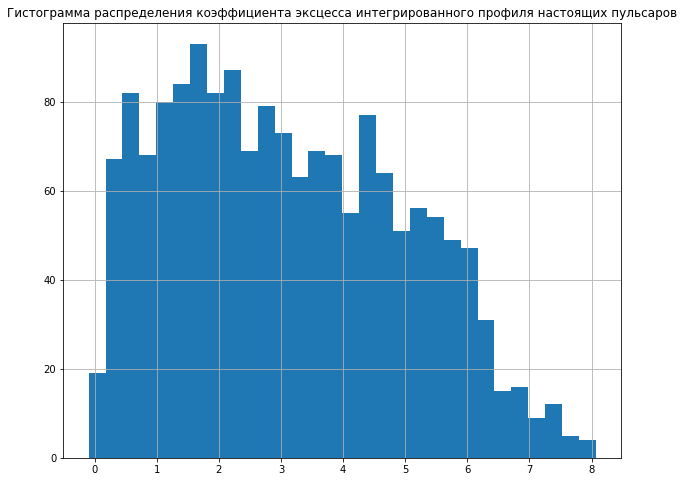

In [88]:
pulsars_positive['excess_kurtoisis_ip'].hist(bins=30)
plt.title('Гистограмма распределения коэффициента эксцесса интегрированного профиля настоящих пульсаров')

In [89]:
pulsars = pd.read_csv('pulsar_stars.csv')
pulsars_negative = pulsars[pulsars['target_class'] == 0]
pulsars_negative['standart_deviation_ip']

0        55.683782
1        58.882430
2        39.341649
3        57.178449
4        40.672225
           ...    
17881    59.847421
17882    49.485605
17883    59.935939
17884    53.902400
17885    85.797340
Name: standart_deviation_ip, Length: 16258, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения коэффициента эксцесса интегрированного профиля ложных кандидатов в пульсары')

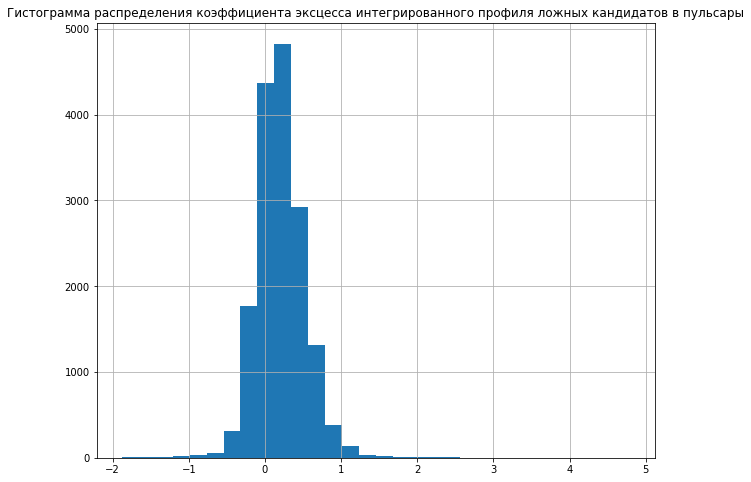

In [90]:
#pulsars_negative['int_sdipdeviation']=pulsars_negative['sdipdeviation'].apply(integer_conversion)
pulsars_negative['excess_kurtoisis_ip'].hist(bins=30)
plt.title('Гистограмма распределения коэффициента эксцесса интегрированного профиля ложных кандидатов в пульсары')

In [91]:
import seaborn as sns

In [92]:
pulsars_negative.head(5)

,integratedprofile_mean,standart_deviation_ip,excess_kurtoisis_ip,skewness_ip,mean_dmsnr,stdeviation_dmsnr,excess_kurtoisis_dmsnr,skewness_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199832776,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677257525,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237458,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642976589,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178929766,11.468720,14.269573,252.567306,0


In [93]:
pulsars_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16258 entries, 0 to 17885
Data columns (total 9 columns):
integratedprofile_mean    16258 non-null float64
standart_deviation_ip     16258 non-null float64
excess_kurtoisis_ip       16258 non-null float64
skewness_ip               16258 non-null float64
mean_dmsnr                16258 non-null object
stdeviation_dmsnr         16258 non-null float64
excess_kurtoisis_dmsnr    16258 non-null float64
skewness_dmsnr            16258 non-null float64
target_class              16258 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.2+ MB


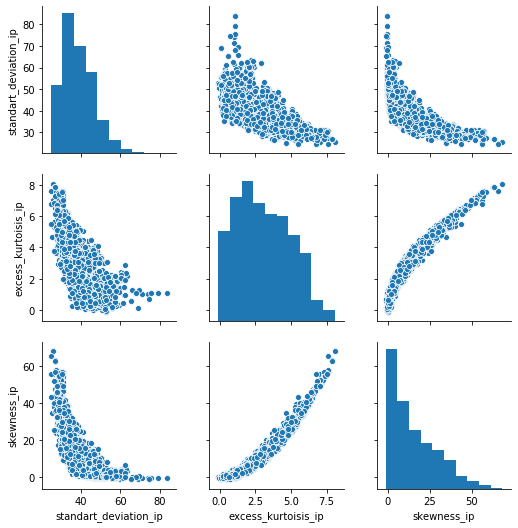

In [94]:
sns_plot = sns.pairplot(
    pulsars_positive[['standart_deviation_ip', 'excess_kurtoisis_ip', 'skewness_ip']])
sns_plot

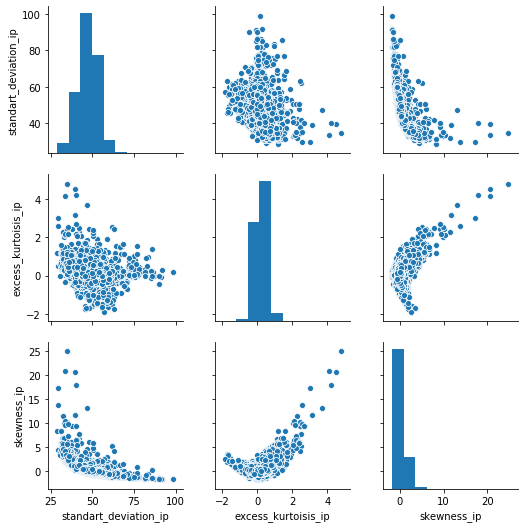

In [95]:
sns_plot = sns.pairplot(
    pulsars_negative[['standart_deviation_ip', 'excess_kurtoisis_ip', 'skewness_ip']])
sns_plot

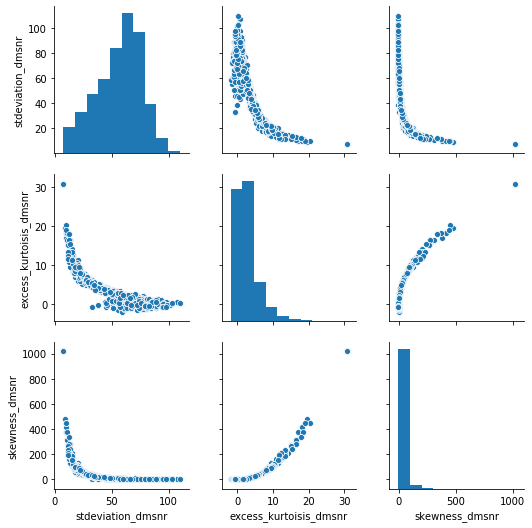

In [96]:
sns_plot = sns.pairplot(
    pulsars_positive[['stdeviation_dmsnr', 'excess_kurtoisis_dmsnr', 'skewness_dmsnr']])
sns_plot

C:\Miniconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Miniconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


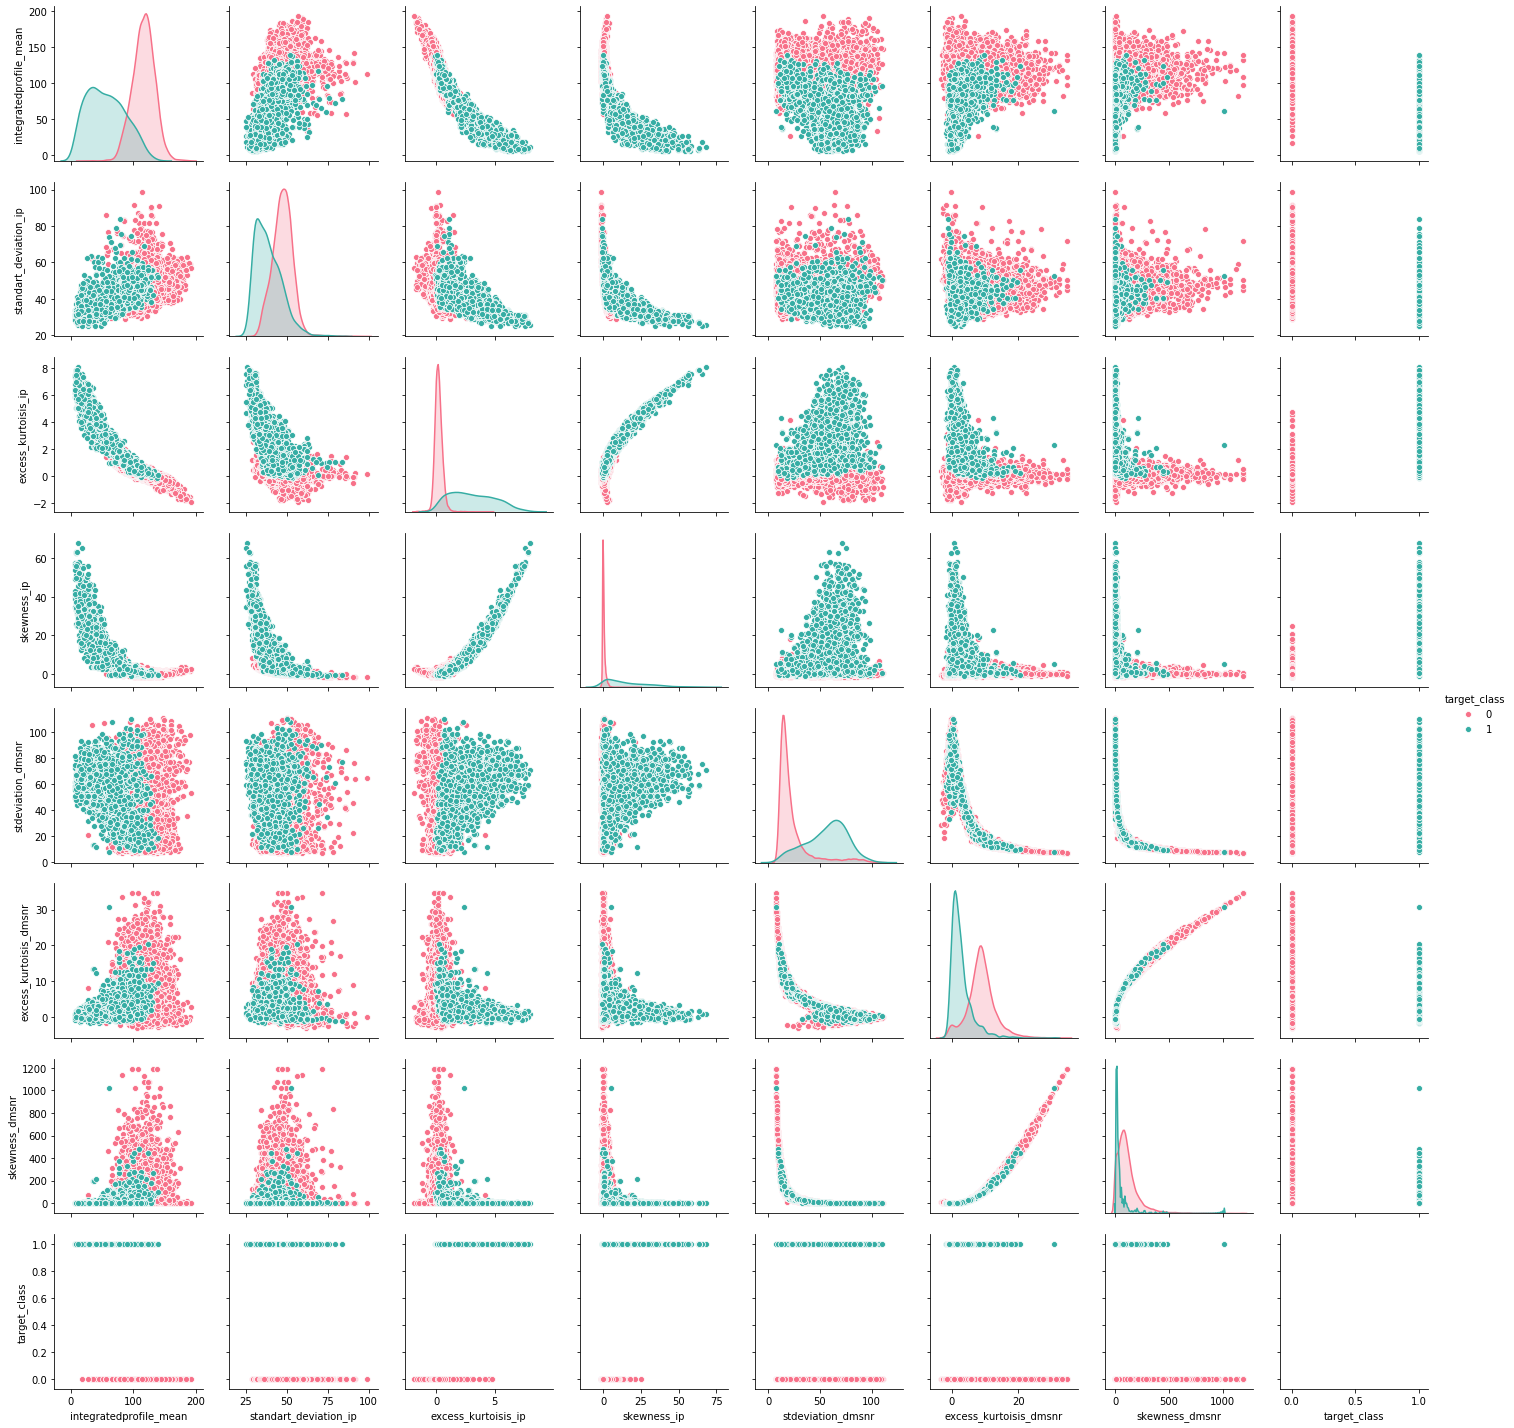

In [97]:
sns.pairplot(pulsars, hue="target_class", palette="husl")

## из приведенного выше примера видно, что seaborn отбрасывает подпорченные данные, в нашем случае это mean_dmsnr


## парный график дает хорошую возможность оценить зависимости между величинами и их распределение
в нашем случае хорошие кпндидаты на изучение stdeviation_dmsnr и excess_kurtoisis_ip стандартное отклонение кривой DM-SNR и коэффициент эксцесса интегрированного профиля

Диаграмму рассеивания этих величин покрупнее:

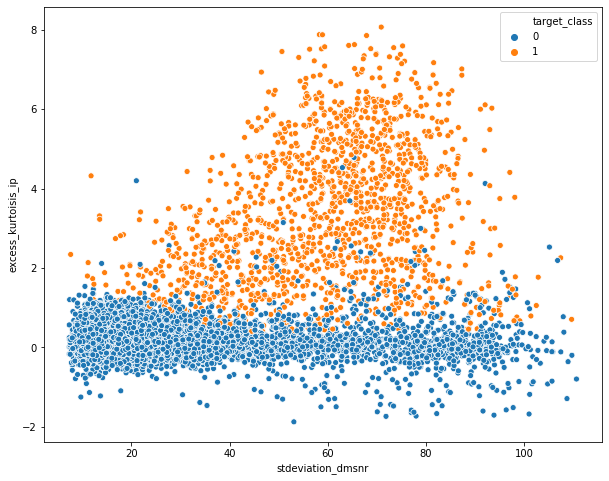

In [98]:
sns.scatterplot(x="stdeviation_dmsnr", y="excess_kurtoisis_ip", hue="target_class", data=pulsars)

## можно выбрать эти признаки для решения задачи классификации пульсаров, хорошо видно, что классы разделяются практически по прямой

Для уточнения и повышения надежности распознавания классов можно использовать другие пары признаков, возможно трех пар будет вполне достаточно 

## Другая пара признаков

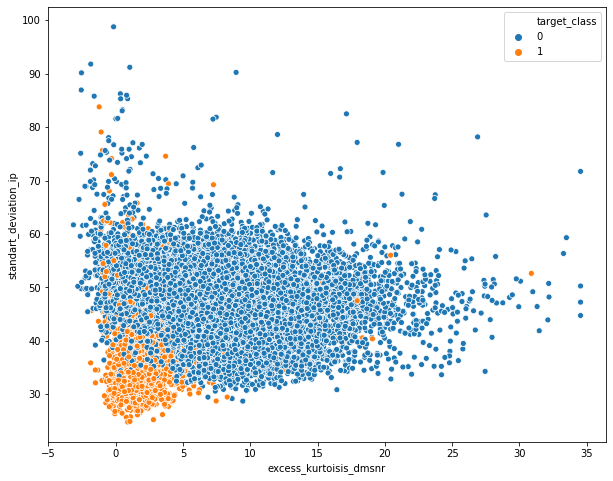

In [99]:
sns.scatterplot(x="excess_kurtoisis_dmsnr", y="standart_deviation_ip", hue="target_class", data=pulsars)


Text(0.5, 1.0, 'Гистограмма распределения коэффициента эксцесса кривой DM-SNR настоящих пульсаров')

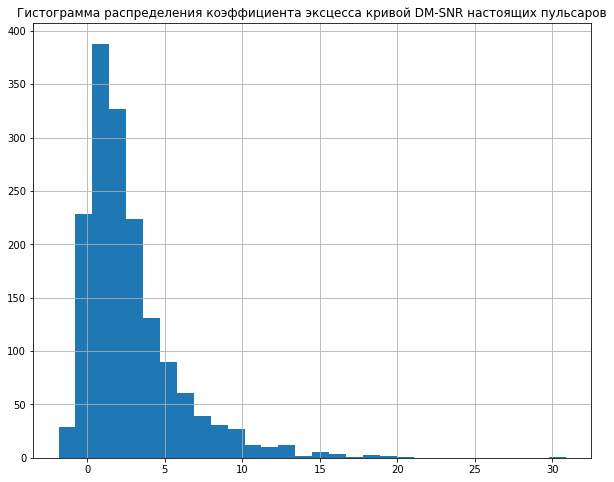

In [100]:
pulsars_positive['excess_kurtoisis_dmsnr'].hist(bins=30)
plt.title('Гистограмма распределения коэффициента эксцесса кривой DM-SNR настоящих пульсаров')

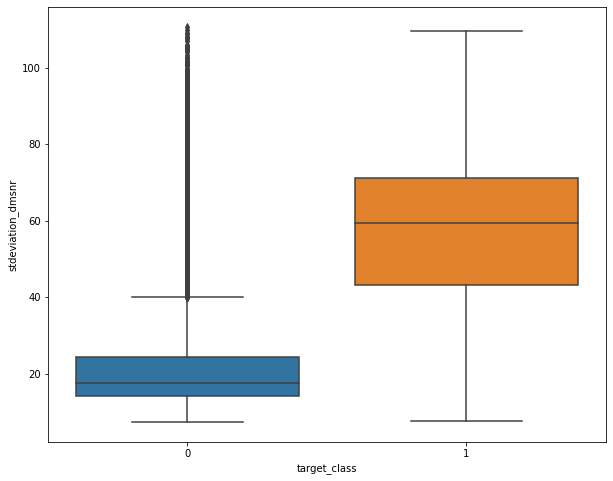

In [101]:
sns.boxplot(x="target_class", y="stdeviation_dmsnr", 
            data=pulsars)

## По признаку stdeviation_dmsnr (коэффициент эксцесса кривой DM-SNR) классы очень хорошо различимы, но в негативном классе имеются "жирные" усы, которые потребуют других, дополнительных (см. выше) признаков для точного распознавания